# NewYorkCity Airbnb Data Analysis, Visualization and Prediction (V2) 

## Note:

This is the second version of this notebook. In this version, I
1. add more analysis, such as the top 10 neighbourhoods with the most listings and the top 10 most and least expensive neighbourhoods in Manhattan and Brooklyn, in the data exploratory analysis section.
2. add Ridge Regression, Lasso Regression, grid search, and feature importance study in the data modeling section.
3. update code and add some other discussions.

## Section 1: Introduction

Airbnb has been widely used these days by people for traveling. Here, I explore the NYC Airbnb dataset to get some insights, especially for the following questions:
    1. What is the status of the Airbnb market in NYC?
    2. Which factors affect the price?
    3. Can we predict the price?

The dataset is from Kaggle (https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data). It has around 49,000 observations with 16 columns. 

## Section 2: Data Understanding

### Import Libraries

In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Loading data

In [325]:
airbnb = pd.read_csv('AB_NYC_2019.csv')

In [327]:
airbnb.shape

(48895, 16)

The dataset has 48895 rows and 16 columns.

In [328]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [329]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [330]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


According to this table, the average listing price is \\$152 and the medium price is \\$106 in NYC.

### Check null values

In [331]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

There are 10052 null values in 'last_reivew' and 'reviews_per_month' columns. There are also some null values in 'name' and 'host_name' columns. Those null values need to be processed for data analysis and modeling.

In [332]:
# drop some unnecessary columns such as 'id' and 'host_name'. 
airbnb2 = airbnb.drop(['id', 'host_name'], axis=1)

In [333]:
# replace NAN in 'name' by 'No name'.
airbnb2.fillna({'name': 'No name'}, inplace=True)

In [334]:
# replace NAN in 'last_review' by 'No review'.
airbnb2.fillna({'last_review': 'No review'}, inplace=True)

In [335]:
# replace NAN in 'reviews_per_month' by zero since if there is no input, most likely it means there is zero review.
airbnb2.fillna({'reviews_per_month': 0}, inplace=True)

In [336]:
# check NAN value in the table
airbnb2.isnull().sum()

name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

There is no null value in the table now and it is good for analysis. 

In [337]:
airbnb2.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,No review,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Section 3: Data Exploratory Analysis

Through data exploratory analysis, I will try to answer the first two questions:
    1. What is the status of the Airbnb market in NYC?
    2. Which factors affect the price?

### Q1: What is the status of the Airbnb market in NYC? 

I study the market from the number of listings, price, availability, etc., and compare each neighbourhood group. 

### Map of Neighbourhood group 

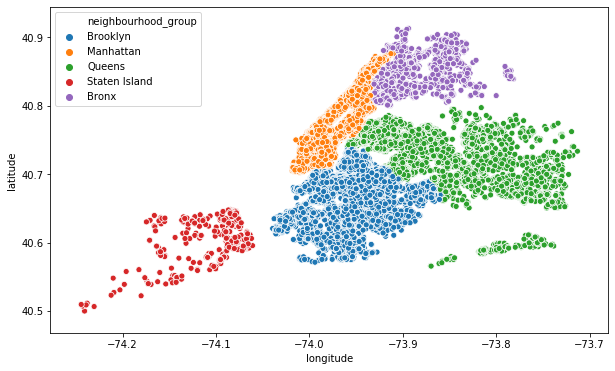

In [338]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=airbnb2, x='longitude', y='latitude', hue='neighbourhood_group', alpha=1)

### Number of listings 

In [339]:
# the number of listings by neighbourhood group
listing_nbg = airbnb2['neighbourhood_group'].value_counts()
listing_nbg

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [340]:
# the percentage of number of listings by neighbourhood group
listing_nbg_percent = listing_nbg / listing_nbg.sum() *100
listing_nbg_percent

Manhattan        44.301053
Brooklyn         41.116679
Queens           11.588097
Bronx             2.231312
Staten Island     0.762859
Name: neighbourhood_group, dtype: float64

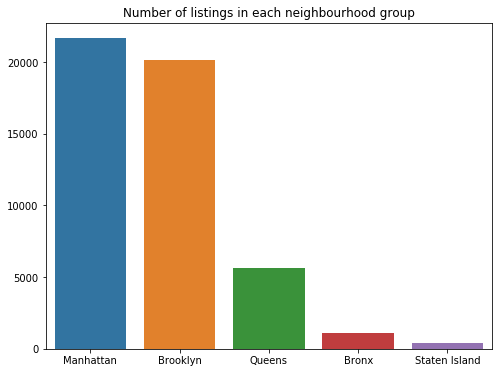

In [341]:
plt.figure(figsize=(8,6))
plt.title('Number of listings in each neighbourhood group')
sns.barplot(x=listing_nbg.index, y=listing_nbg.values)

Most of the listings in NYC are in Manhattan and Brooklyn. Both of them have more than 20,000 listings, which are more than 85% of the overall listings. 

Let us check out the top 10 neighbourhoods with the most listings.

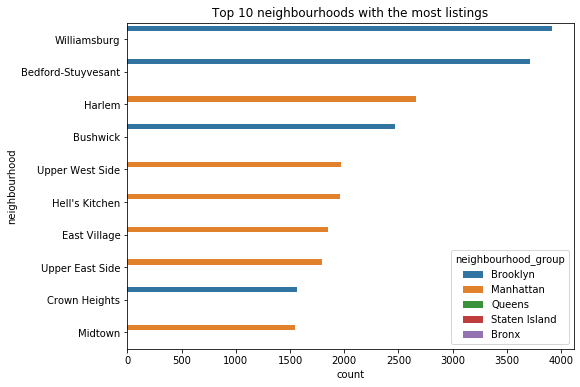

In [342]:
plt.figure(figsize=(8,6))
plt.title('Top 10 neighbourhoods with the most listings')
sns.countplot(y = airbnb2['neighbourhood'], order=airbnb2['neighbourhood'].value_counts().index[:10], 
              hue=airbnb2['neighbourhood_group']) 

The neighbourhood with the most listings is Williamsburg in Brooklyn. The other top 10 neighbourhoods with the most listings include Bedford-Stuyvesant, Harlem, Bushwich, Upper West Side, Hell's Kitchen, East Village, Upper East Side, Crown Heights, and Midtown. All of them are either in Brooklyn or Manhattan.  

### Room type

Entire home/apt    51.966459
Private room       45.661111
Shared room         2.372431
Name: room_type, dtype: float64


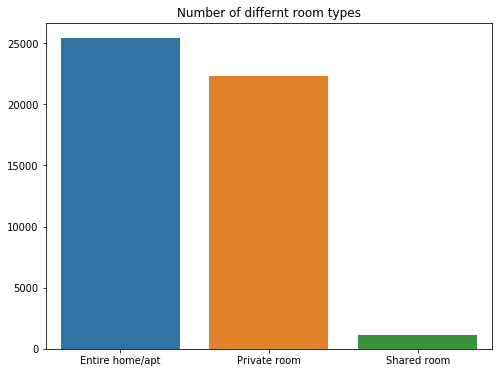

In [343]:
roomtype = airbnb2['room_type'].value_counts()
roomtype_percent = roomtype / roomtype.sum() *100
print(roomtype_percent)

plt.figure(figsize=(8,6))
plt.title('Number of differnt room types')
sns.barplot(x=roomtype.index, y=roomtype.values)

~52% of listings are entire home/apt, and 45% are private room. Only 2% are shared room.

Let us count the number of each room type by neighbourhood group.

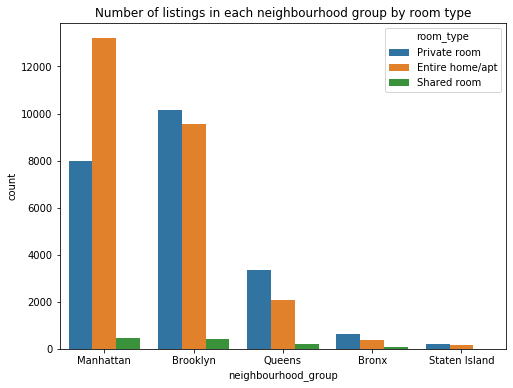

In [344]:
# Room type by neighbourhood group
plt.figure(figsize=(8,6))
plt.title('Number of listings in each neighbourhood group by room type')
sns.countplot(airbnb2['neighbourhood_group'], hue=airbnb2['room_type'], 
              order=airbnb2['neighbourhood_group'].value_counts().index)

Among different neighbourhood groups, Brooklyn has the most private rooms, while Manhattan has the most entire homes/apts.

### Price

/Users/lizhen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


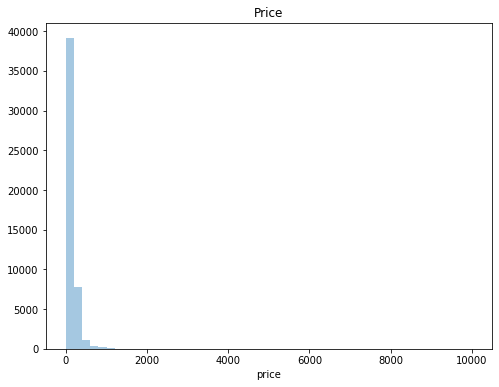

In [345]:
plt.figure(figsize=(8,6))
plt.title('Price')
sns.distplot(airbnb2['price'], kde=False)

Due to some very high prices, it is hard to clearly see the distribution of price.

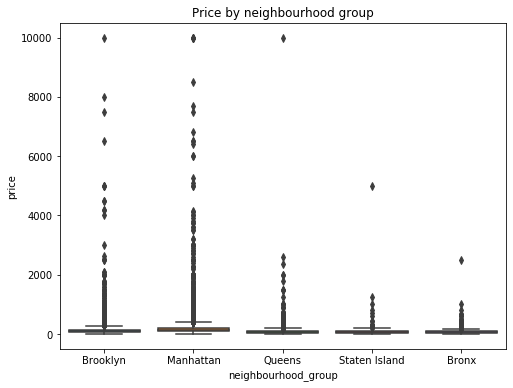

In [351]:
# price by neighbourhood group
plt.figure(figsize=(8,6))
plt.title('Price by neighbourhood group')
sns.boxplot(data=airbnb2, x='neighbourhood_group', y='price')

It is also hard to see the difference in price among different neighbourhoods due to outliers. The outliers need to be removed to compare the price.

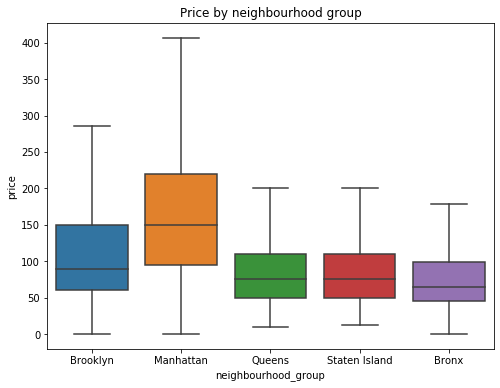

In [352]:
# Do not show the outliers
plt.figure(figsize=(8,6))
plt.title('Price by neighbourhood group')
sns.boxplot(data=airbnb2, x='neighbourhood_group', y='price', showfliers=False)

Without shown outliers, the median price in Manhattan is ~\\$150, which is much higher than other neighbourhood groups (less than \\$100).

In [353]:
# check the percentage of the listings that the price is higher than $400 in all listings. 
len(airbnb2[airbnb2['price']>400])/len(airbnb2)

0.03605685652929747

It looks like the listings that the price is more than $400 are considered outliers. Since they are only ~3.6% of all listings, it is ok to drop the listings that the prices are higher than \\$400 for analysis, visualization, and modeling when it is necessary.

In [354]:
# drop the listings that the price is higher than $400.
airbnb2_400 = airbnb2[airbnb2['price']<400]

/Users/lizhen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


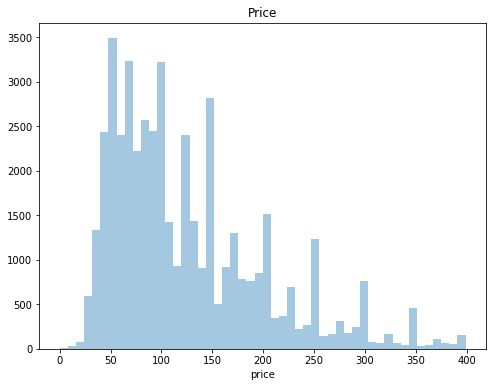

In [355]:
# distribution of price for the listings that the price is less than $400.
plt.figure(figsize=(8,6))
plt.title('Price')
sns.distplot(airbnb2_400['price'], kde=False)

In [356]:
airbnb2_400['price'].mean()

125.09284328565033

In [357]:
airbnb2_400['price'].median()

100.0

For the listings that the price is less than \\$400, the mean price is \\$125 and the median price is \\$100.

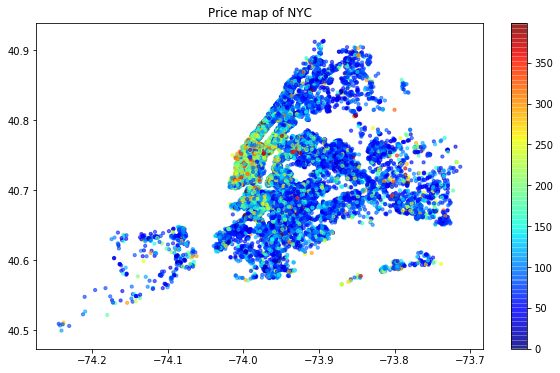

In [358]:
# price map
plt.figure(figsize=(10,6))
plt.title('Price map of NYC')
plt.scatter(data=airbnb2_400, x='longitude', y='latitude', s=10, c='price', cmap ='jet', alpha=0.6)
plt.colorbar()

The price map of NYC. The most expensive area is Manhattan and some locations of Brooklyn, as indicated by the color. Let us check out the top 10 neighbourhoods in Manhattan and Brooklyn with the highest and lowest median price.

The top 10 most expensive neighbourhoods in Manhattan are between \\$200 and $300. The most expensive neighbourhood is Tribeca.

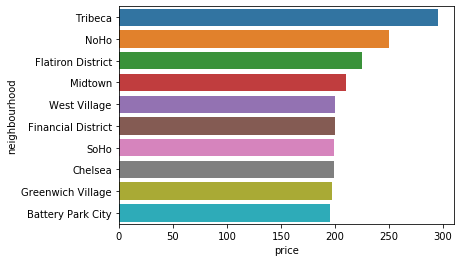

In [359]:
airbnb2_man = airbnb2[airbnb2['neighbourhood_group']=='Manhattan']
airbnb2_mansort = airbnb2_man.groupby(['neighbourhood']).median().sort_values(by='price',ascending=False).reset_index()
sns.barplot(data=airbnb2_mansort[:10], y='neighbourhood', x='price')

The top 10 least expensive neighbourhoods in Manhattan are between \\$70 and $130. The cheapest neighbourhood is Washington Heights.

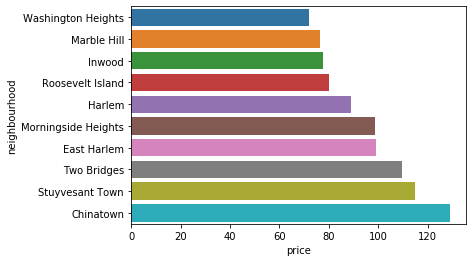

In [360]:
airbnb2_mansort = airbnb2_man.groupby(['neighbourhood']).median().sort_values(by='price',ascending=True).reset_index()
sns.barplot(data=airbnb2_mansort[:10], y='neighbourhood', x='price')

The top 10 most expensive neighbourhoods in Brooklyn are between \\$130 and $190. The most expensive neighbourhood is DUMBO.

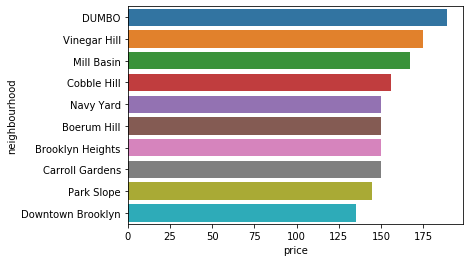

In [361]:
airbnb2_bro = airbnb2[airbnb2['neighbourhood_group']=='Brooklyn']
airbnb2_brosort = airbnb2_bro.groupby(['neighbourhood']).median().sort_values(by='price',ascending=False).reset_index()
sns.barplot(data=airbnb2_brosort[:10], y='neighbourhood', x='price')

The top 10 least expensive neighbourhoods in Brooklyn are between \\$50 and $75. The cheapest neighbourhood is Borough Park.

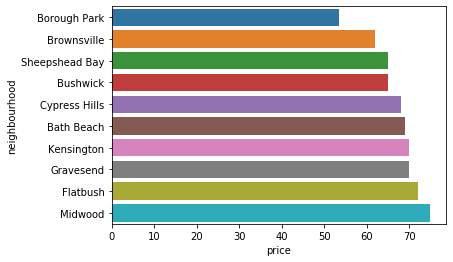

In [362]:
airbnb2_brosort = airbnb2_bro.groupby(['neighbourhood']).median().sort_values(by='price',ascending=True).reset_index()
sns.barplot(data=airbnb2_brosort[:10], y='neighbourhood', x='price')

### Availability

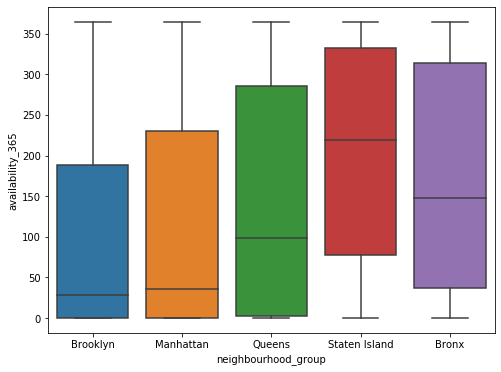

In [363]:
plt.figure(figsize=(8,6))
sns.boxplot(data=airbnb2, x='neighbourhood_group', y='availability_365')

The availability is lower in Brooklyn and Manhattan compared to other locations.

### What are the popular words in names?

It is interesting to see what are the popular words in the names. Here, I use Wordcloud to check the popularity of words in the names.

In [364]:
from wordcloud import WordCloud

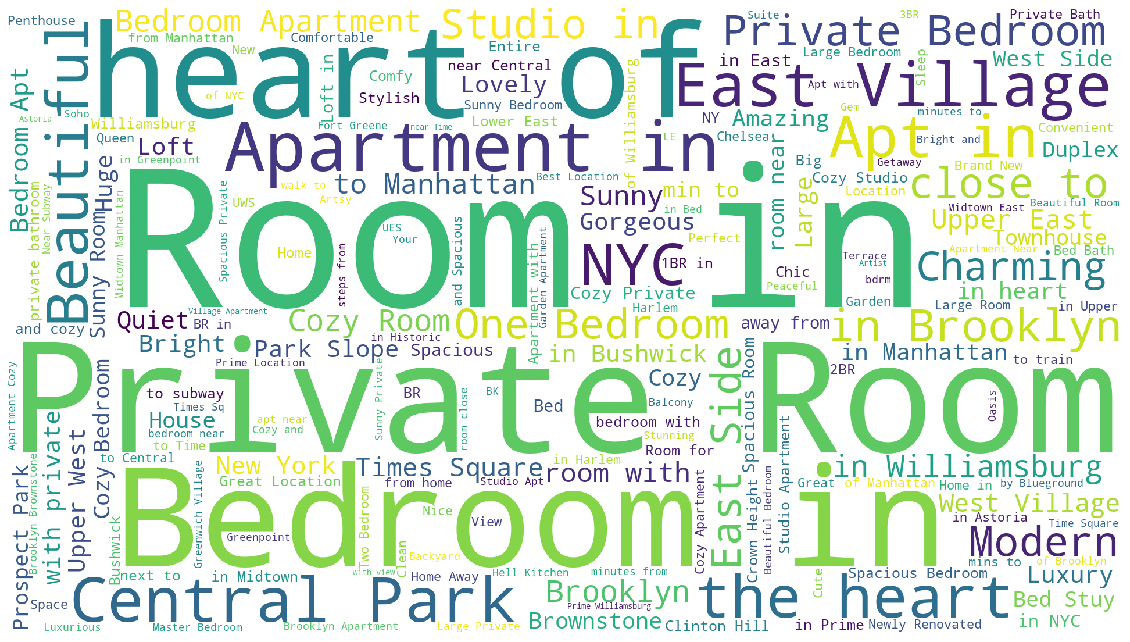

In [365]:
plt.figure(figsize=(20,16))
wordcloud = WordCloud(background_color='white', width=1920, height=1080).generate(' '.join(airbnb2['name']))
plt.axis('off')
plt.imshow(wordcloud)

Some words quite popular in the names such as 'private', 'beautiful', 'cozy', 'modern', and 'quiet', which indicate some important features that people may appreciate. Some other popular words in the names show the popular locations, such as 'central park', 'Brooklyn', 'east village', and 'east side'.

### Q2: Which factors affect the price?

To understand which factors affect the price, I check out the correlation between price and neighbourhood, room type, minimum nights, listings count, availability, etc.

### Price vs. Neighbourhood

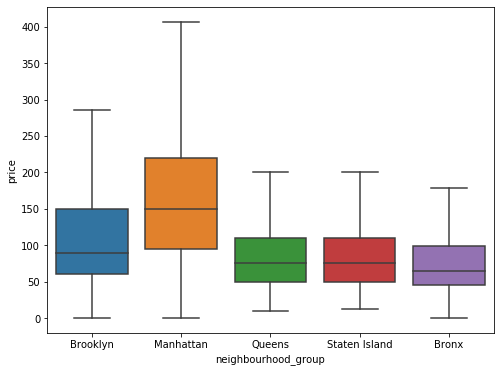

In [366]:
# drop outliers
plt.figure(figsize=(8,6))
sns.boxplot(data=airbnb2, x='neighbourhood_group', y='price', showfliers=False)

The price in manhattan is much higher than in other locations.

### Price vs. Room Type

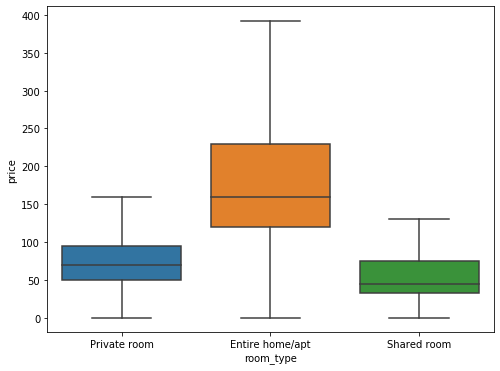

In [367]:
plt.figure(figsize=(8,6))
sns.boxplot(data=airbnb2, x='room_type', y='price', showfliers=False)

Room type: The entire home/apt is much more expensive than the private room and shared room. The private room is slightly more expensive than the shared room.

### Price vs. Minimum nights

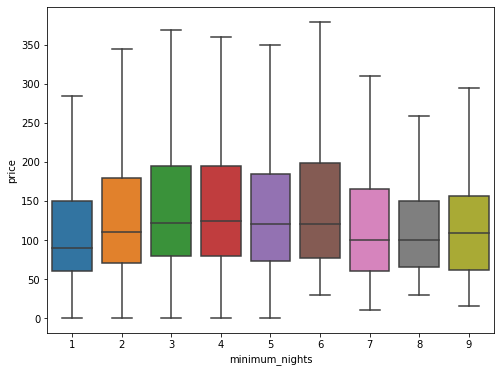

In [368]:
# use the listings that the minimum nights are less than 10 as an example.
plt.figure(figsize=(8,6))
sns.boxplot(x=airbnb2[airbnb2['minimum_nights']<10].minimum_nights, y=airbnb2['price'], showfliers=False)

No clear trend. But looks like the price that the minimum nights equal to 1 is slightly lower. Interesting.

### Price vs. Calculated_host_listings_count

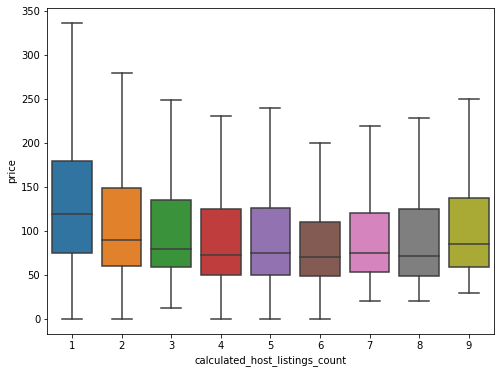

In [369]:
# show the cases that the calculated_host_listings_count is less than 10 as an example.
plt.figure(figsize=(8,6))
sns.boxplot(x=airbnb2[airbnb2['calculated_host_listings_count']<10].calculated_host_listings_count, y=airbnb2['price'], showfliers=False)

It looks like the prices that the calculated_host_listings_count equals to 1 are higher. It may indicate the owner who has only one property for rent has a higher expectation on the price.

### Price vs. Availability

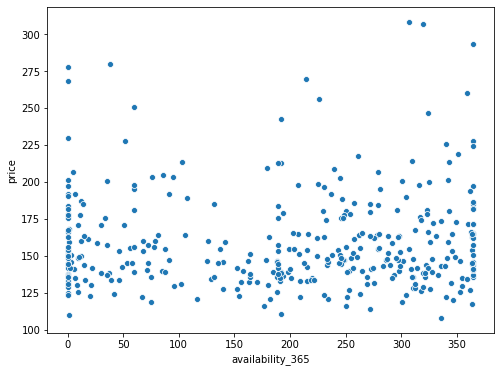

In [370]:
plt.figure(figsize=(8,6))
price_by_availability = airbnb2.groupby('availability_365')['price'].mean()
sns.scatterplot(x=airbnb2['availability_365'], y=price_by_availability)

No clear trend between availability and price.

According to those results, looks like the price is mainly affected by the location and room type.

## Section 4: Data Modeling

Through data modeling, I try to predict the price using five different models: Linear Regression, Ridge Regression, Lasso Regression, Decision Tree, and Random Forest. I also use grid search to improve the model. 

### Q3: Can we predict the price?

### Data preparation

In [371]:
# the dataset that the prices are less than $400 is used.
airbnb2_400.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,No review,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Processing categorical columns 

In [372]:
airbnb2_400.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46907 entries, 0 to 48894
Data columns (total 14 columns):
name                              46907 non-null object
host_id                           46907 non-null int64
neighbourhood_group               46907 non-null object
neighbourhood                     46907 non-null object
latitude                          46907 non-null float64
longitude                         46907 non-null float64
room_type                         46907 non-null object
price                             46907 non-null int64
minimum_nights                    46907 non-null int64
number_of_reviews                 46907 non-null int64
last_review                       46907 non-null object
reviews_per_month                 46907 non-null float64
calculated_host_listings_count    46907 non-null int64
availability_365                  46907 non-null int64
dtypes: float64(3), int64(6), object(5)
memory usage: 5.4+ MB


In [373]:
# first, drop unnecessary columns. 
airbnb3 = airbnb2_400.drop(['name','host_id', 'last_review'], axis=1)
airbnb3.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [374]:
airbnb3['neighbourhood_group'].nunique()

5

In [375]:
airbnb3['neighbourhood'].nunique()

219

In [376]:
airbnb3['room_type'].nunique()

3

I process categorical columns using two methods: LabelEncoder and get_dummies, and compare their results in modeling.

In [377]:
# processing categorical columns using LabelEncoder.
import sklearn
from sklearn.preprocessing import LabelEncoder
airbnb_le = airbnb3.copy()
le = LabelEncoder()
airbnb_le['neighbourhood_group'] = le.fit_transform(airbnb_le['neighbourhood_group'])
airbnb_le['neighbourhood'] = le.fit_transform(airbnb_le['neighbourhood'])
airbnb_le['room_type'] = le.fit_transform(airbnb_le['room_type'])
airbnb_le.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,107,40.64749,-73.97237,1,149,1,9,0.21,6,365
1,2,126,40.75362,-73.98377,0,225,1,45,0.38,2,355
2,2,93,40.80902,-73.94190,1,150,3,0,0.00,1,365
3,1,41,40.68514,-73.95976,0,89,1,270,4.64,1,194
4,2,61,40.79851,-73.94399,0,80,10,9,0.10,1,0


In [378]:
# preprocessing categorical columns using get_dummies method.
airbnb_dummies = pd.get_dummies(airbnb3)
airbnb_dummies.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,...,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,365,0,1,...,0,0,0,0,0,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,0.38,2,355,0,0,...,0,0,0,0,0,0,0,1,0,0
2,40.80902,-73.94190,150,3,0,0.00,1,365,0,0,...,0,0,0,0,0,0,0,0,1,0
3,40.68514,-73.95976,89,1,270,4.64,1,194,0,1,...,0,0,0,0,0,0,0,1,0,0
4,40.79851,-73.94399,80,10,9,0.10,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


(11.0, 0.0)

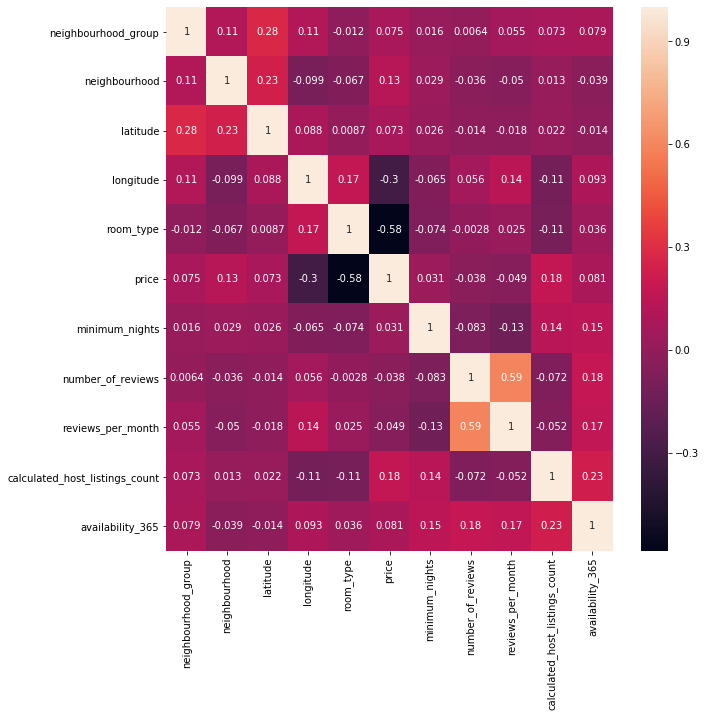

In [379]:
corr = airbnb_le.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(corr, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

It looks like the price is more related to the location and room type, which agrees with our previous analysis. It is interesting that the calculated_host_listings_count also shows a high correlation with the price.

### Modeling

Five models are used to predict the price: Linear Regression, Ridge Regression, Lasso Regression, Decision Tree, and Random Forest. A general model function is first created and is then used by each model. 

In [380]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [381]:
# general model 
def modeling(model, X, y, test_size=0.3, random_state=42):
    
    '''
    INPUT
    model - sklearn model used for price predication
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    test_size - proportion of data as test data, float between 0 and 1, default 0.3
    random_state - random state for train_test_split, int, default 42
    
    OUTPUT
    model - fitted model
    results - a list of the results including r2_score_train, r2_score_test, rmse_train, rmse_test
    r2_score_train - r2 score on the train data, float
    r2_score_test - r2 score on the test data, float
    rmse_train - rmse score on train data, float
    rmse_test - rmse score on test data, float
    '''
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    r2_score_train = r2_score(y_train, y_train_pred)
    r2_score_test = r2_score(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    results = [r2_score_train, r2_score_test, rmse_train, rmse_test]
    
    return model, results

In [382]:
# print results
def showResults(results):
    '''
    INPUT
    results - a list of the results of a model including r2_score_train, r2_score_test, rmse_train, rmse_test 

    r2_score_train - r2 score on the train data, float
    r2_score_test - r2 score on the test data, float
    rmse_train - rmse score on train data, float
    rmse_test - rmse score on test data, float
    
    OUTPUT
    print r2_score_train, r2_score_test, rmse_train, rmse_test  
    '''
    
    r2_score_train, r2_score_test, rmse_train, rmse_test = results
    print('Results:')
    print('R2 score on training set: {:.3f}'.format(r2_score_train))
    print('R2 score on testing set: {:.3f}'.format(r2_score_test))
    print('RMSE on training set: {:.3f}'.format(rmse_train))
    print('RMSE on testing set: {:.3f}'.format(rmse_test))
    

Both airbnb_le (based on the LabelEncoder method) and airbnb_dummies (based on the get_dummies method) are used for each model. Their results are also compared.

In [383]:
scaler = StandardScaler()

# based on LabelEncoder method
X_le = airbnb_le.drop('price', axis=1)
X_le_scaled = scaler.fit_transform(X_le)
y_le = airbnb_le['price']

# based on get_dummies method
X_dm = airbnb_dummies.drop('price', axis=1)
X_dm_scaled = scaler.fit_transform(X_dm)
y_dm = airbnb_dummies['price']

/Users/lizhen/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lizhen/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/lizhen/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lizhen/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


#### Linear Regression 

In [384]:
# Linear Regression using airbnb_le (based on LabelEncoder method) 
lr = LinearRegression()
lr_model_le, lr_results_le = modeling(lr, X_le_scaled, y_le)
print('Linear Regression (based on LabelEncoder method):\n')
print('Model:\n', lr_model_le)
showResults(lr_results_le)

Linear Regression (based on LabelEncoder method):

Model:
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Results:
R2 score on training set: 0.421
R2 score on testing set: 0.422
RMSE on training set: 57.763
RMSE on testing set: 57.994


In [385]:
# Linear Regression using airbnb_dummies (based on get_dummies method) 
lr_model_dm, lr_results_dm = modeling(lr, X_dm_scaled, y_dm)
print('Linear Regression (based on get_dummies method):')
print('Model:\n', lr_model_dm)
showResults(lr_results_dm)

Linear Regression (based on get_dummies method):
Model:
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Results:
R2 score on training set: 0.502
R2 score on testing set: -1464195994886967673225216.000
RMSE on training set: 53.555
RMSE on testing set: 92265387474726.672


The score of the linear regression model based on the LabelEncoder method is only 0.422. The model based on the get_dummies method looks bad. Let us try to regularize the linear models using Ridge Regression and Lasso Regression.

#### Ridge Regression 

In [386]:
# Ridge Regression using airbnb_le (based on LabelEncoder method) 
ridge = Ridge(alpha=1, solver='cholesky')
ridge_model_le, ridge_results_le = modeling(ridge, X_le_scaled, y_le)
print('Ridge Regression (based on LabelEncoder method):\n')
print('Model:\n', ridge_model_le)
showResults(ridge_results_le)

Ridge Regression (based on LabelEncoder method):

Model:
 Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)
Results:
R2 score on training set: 0.421
R2 score on testing set: 0.422
RMSE on training set: 57.763
RMSE on testing set: 57.994


In [387]:
# Ridge Regression using airbnb_dummies (based on get_dummies method) 
ridge = Ridge(alpha=1, solver='cholesky')
ridge_model_dm, ridge_results_dm = modeling(ridge, X_dm_scaled, y_dm)
print('Ridge Regression (based on get_dummies method):\n')
print('Model:\n', ridge_model_dm)
showResults(ridge_results_dm)

Ridge Regression (based on get_dummies method):

Model:
 Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)
Results:
R2 score on training set: 0.503
R2 score on testing set: 0.502
RMSE on training set: 53.523
RMSE on testing set: 53.814


#### Lasso Regression 

In [388]:
# Lasso Regression using airbnb_le (based on LabelEncoder method) 
lasso = Lasso(alpha=0.1)
lasso_model_le, lasso_results_le = modeling(lasso, X_le_scaled, y_le)
print('Lasso Regression (based on LabelEncoder method):\n')
print('Model:\n', lasso_model_le)
showResults(lasso_results_le)

Lasso Regression (based on LabelEncoder method):

Model:
 Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Results:
R2 score on training set: 0.421
R2 score on testing set: 0.422
RMSE on training set: 57.764
RMSE on testing set: 57.991


In [389]:
# Lasso Regression using airbnb_dummies (based on get_dummies method) 
lasso_model_dm, lasso_results_dm = modeling(lasso, X_dm_scaled, y_dm)
print('Lasso Regression (based on get_dummies method):\n')
print('Model:\n', lasso_model_dm)
showResults(lasso_results_dm)

Lasso Regression (based on get_dummies method):

Model:
 Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Results:
R2 score on training set: 0.502
R2 score on testing set: 0.502
RMSE on training set: 53.559
RMSE on testing set: 53.791


The Lasso and Ridge regressions improve the R2 score to 0.502 for the data based on the get_dummies method. Since the linear regression model based on the LabelEncoder method is actually underfitting, Ridge and Lasso regression would not help much.

#### Decision Tree Regression

In [390]:
# Decision tree regression using airbnb_le (based on LabelEncoder method) 

dt = DecisionTreeRegressor(max_depth=None, min_samples_leaf=1)
dt_model_le, dt_results_le = modeling(dt, X_le, y_le)
print('Decision Tree Regression (based on LabelEncoder method):\n')
print('Model:\n', dt_model_le)
showResults(dt_results_le)

Decision Tree Regression (based on LabelEncoder method):

Model:
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
Results:
R2 score on training set: 1.000
R2 score on testing set: 0.132
RMSE on training set: 0.000
RMSE on testing set: 71.023


The score on the training set is much higher than that on the testing set, indicating overfitting. 
Try to solve the overfitting by limiting max_depth and min_samples_leaf.

In [391]:
# Decision Tree, limiting max_depth and min_samples_leaf
dt = DecisionTreeRegressor(max_depth=10, min_samples_leaf=2)
dt_model_le, dt_results_le = modeling(dt, X_le, y_le)
print('Decision Tree Regression (based on LabelEncoder method):\n')
print('Model:\n', dt_model_le)
showResults(dt_results_le)

Decision Tree Regression (based on LabelEncoder method):

Model:
 DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
Results:
R2 score on training set: 0.610
R2 score on testing set: 0.503
RMSE on training set: 47.428
RMSE on testing set: 53.770


Limiting max_depth and min_samples_leaf increases the score to 0.503.

In [392]:
# using airbnb_dummies (based on get_dummies method) 

dt = DecisionTreeRegressor(max_depth=10, min_samples_leaf=2)
dt_model_dm, dt_results_dm = modeling(dt, X_dm, y_dm)
print('Decision Tree Regression (based on get_dummies method):\n')
print('Model:\n', dt_model_dm)
showResults(dt_results_dm)

Decision Tree Regression (based on get_dummies method):

Model:
 DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
Results:
R2 score on training set: 0.611
R2 score on testing set: 0.500
RMSE on training set: 47.344
RMSE on testing set: 53.900


The socres of two decision tree models are close. 

#### Random Forest 

In [393]:
# Random Forest using airbnb_le (based on LabelEncoder method) 

rf = RandomForestRegressor(max_depth=None)
rf_model_le, rf_results_le = modeling(rf, X_le, y_le)
print('Random Forest Regression (based on LabelEncoder method):\n')
print('Model:\n', rf_model_le)
showResults(rf_results_le)

/Users/lizhen/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Regression (based on LabelEncoder method):

Model:
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
Results:
R2 score on training set: 0.915
R2 score on testing set: 0.509
RMSE on training set: 22.154
RMSE on testing set: 53.434


Score on training set is much higher than that on testing set, indicating overfitting. Try to solve the overfitting by limiting the max_depth.

In [394]:
# Random Forest, try to solve the overfitting by limiting the max_depth.

rf = RandomForestRegressor(max_depth=10)
rf_model_le, rf_results_le = modeling(rf, X_le, y_le)
print('Random Forest Regression (based on LabelEncoder method):\n')
print('Model:\n', rf_model_le)
showResults(rf_results_le)


/Users/lizhen/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Regression (based on LabelEncoder method):

Model:
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
Results:
R2 score on training set: 0.638
R2 score on testing set: 0.548
RMSE on training set: 45.671
RMSE on testing set: 51.255


In [395]:
# using airbnb_dummies (based on get_dummies method) 

rf = RandomForestRegressor(max_depth=10)
rf_model_dm, rf_results_dm = modeling(rf, X_dm, y_dm)
print('Random Forest Regression (based on get_dummies method):\n')
print('Model:\n', rf_model_dm)
showResults(rf_results_dm)

/Users/lizhen/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Regression (based on get_dummies method):

Model:
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
Results:
R2 score on training set: 0.637
R2 score on testing set: 0.551
RMSE on training set: 45.729
RMSE on testing set: 51.099


#### Grid Search

In [317]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [10, 100, 500], 'max_depth': [5, 50, 100], 'min_samples_leaf': [1, 5, 10]}]

forest_reg = RandomForestRegressor()

X_train, X_test, y_train, y_test = train_test_split(X_le, y_le, test_size=0.3, random_state=12)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [10, 100, 500], 'max_depth': [5, 50, 100], 'min_samples_leaf': [1, 5, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [318]:
grid_search.best_params_

{'max_depth': 50, 'min_samples_leaf': 5, 'n_estimators': 500}

In [319]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [320]:
gs_best = grid_search.best_estimator_
final_model, final_results = modeling(gs_best, X_le, y_le)
print('Final Random Forest Regression:\n')
print('Model:\n', final_model)
showResults(final_results)

Final Random Forest Regression:

Model:
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
Results:
R2 score on training set: 0.783
R2 score on testing set: 0.561
RMSE on training set: 35.378
RMSE on testing set: 50.506


The final random forest model selected through grid search gives a score of 0.561.

#### Feature Importance

Let us check out the importance of features.

In [321]:
feature_importance = final_model.feature_importances_
feature_importance

array([0.00132872, 0.0283332 , 0.12809352, 0.16627777, 0.44666315,
       0.04313211, 0.04184964, 0.04656158, 0.029459  , 0.06830132])

In [322]:
attributes = list(X_le.columns)
attributes

['neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [323]:
sorted(zip(feature_importance, attributes), reverse=True)

[(0.4466631494194055, 'room_type'),
 (0.16627776534489258, 'longitude'),
 (0.12809352467048873, 'latitude'),
 (0.06830131802708275, 'availability_365'),
 (0.0465615777150526, 'reviews_per_month'),
 (0.0431321069485271, 'minimum_nights'),
 (0.0418496385527613, 'number_of_reviews'),
 (0.029459004505031642, 'calculated_host_listings_count'),
 (0.028333195361014793, 'neighbourhood'),
 (0.001328719455742781, 'neighbourhood_group')]

The most important features are room type and location.

## Conclusions 

#### 1. What is the status of Airbnb market in NYC?
    - Most of the listings in NYC are in Manhattan and Brooklyn. Both of them have more than 20,000 listings, which are over 85% of the overall listings. The neighbourhood with the most listings is Williamsburg in Brooklyn. 
    - Around 52% of listings are entire home/apt, and 45% are private room. Only 2% are shared rooms. Among different neighbourhood groups, Brooklyn has the most private rooms, while Manhattan has the most entire homes/apts.
    - The median price in Manhattan is ~$150, which is much higher than other neighbourhood groups (less than $100). 
    - The top 10 most expensive neighbourhoods in Manhattan are between $200 to $300. The most expensive neighbourhood is Tribeca. The top 10 least expensive neighbourhoods in Manhattan are between $70 to $130. The cheapest neighbourhood is Washington Heights.
    - The availability is lower in Brooklyn and Manhattan compared to other locations.
    - Some words are quite popular in the name such as 'private', 'beautiful', 'cozy', 'modern', and 'quiet'. 
    
#### 2. Which factors affect the price?
    - Location: The price in Manhattan is much higher than in other locations.
    - Room type: The entire home/apt is much more expensive than the private room and shared room. The private room is slightly more expensive than the shared room.
    - Host listings count: It looks like the listings that the calculated_host_listings_count equals to 1 are more expensive.
    - Minimum nights: No clear trend.
    - Availability: No clear trend.

#### 3. Can we predict the price?
    - Five models are used to predict the price: Linear Regression, Ridge Regression, Lasso Regression, Decision Tree, and Random Forest. Random forest gives a better result than other models.
    - Grid search is used to improve the model further. The best model gives an R2 score of 0.561.
    - According to the model, the most important features are room type and location.